In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import rc
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import quad, dblquad
import importlib
import itertools
import os

import utilities as util 

In [4]:
PATHFLAG = 1
# Add Latex to path (Otherwise, render using python)
if os.path.isdir("/usr/local/texlive/2019/bin/x86_64-darwin") and PATHFLAG==1:
    os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2019/bin/x86_64-darwin'
    # Set Render &  Compile Settings
    rc('text', usetex=True)
    rc('font', family='serif')
    PATHFLAG = 0
elif os.path.isdir("/usr/share/texlive/texmf-dist") and PATHFLAG==1:
    os.environ["PATH"] += os.pathsep + '/usr/share/texlive/texmf-dist'
    # Set Render &  Compile Settings
    rc('text', usetex=True)
    rc('font', family='serif')
    PATHFLAG = 0
else:
   print('This code uses latex to render plots. Please add your latex installation path to python.')

# Create Directory for plots
if not os.path.exists('./plots'):
    os.makedirs('./plots')
params= {'text.latex.preamble' : [r'\usepackage{amsfonts}']}
plt.rcParams.update(params)

In [14]:
# %%
importlib.reload(util)
# model = "specialcase"
model = "fullparking"
T = 100;                    # Total simulation time (hr)
num_t_samples = T*60        # Number of time samples in simulation interval   

# Poisson Parameter
lambdaval = 20 # EVs/hr

# Define upper & lower bounds on demand values & distribution type
x_min = 0
x_max = 100
x_dist_type = "uniform"
x_list = [x_min, x_max, x_dist_type]

# Define upper & lower bounds on impatience factor values & distribution type
alpha_min = 0
alpha_max = 10
alpha_dist_type = "uniform"
alpha_list = [alpha_min, alpha_max, alpha_dist_type]

# Define upper & lower bounds on time spent at location
xi_min = 0
xi_max = 3.5
xi_dist_type = "uniform"
xi_list = [xi_min, xi_max, xi_dist_type]

# V & r coefficients for N pricing functions
Beta = 2.0
# R = np.array([15, 25, 35, 45])       # $/kWh
# V = np.array([5.00, 5.02, 5.04, 5.06])  #kW

R = np.array([15, 25, 35, 45])       # $/kWh
V = np.array([.20, .22, .24, .26])  #kW
ChargingFacilityDiscrete = util.ChargingFacilityDiscrete(V, R, T, alpha_list, x_list, xi_list, 
                                         lambdaval, num_t_samples, model, Beta)
# ChargingFacilityDiscrete()
if model != "specialcase":
    print("Case 1:", ChargingFacilityDiscrete.price_func_min_probability_case1) # all alpha_j case
    print("Case 2:", ChargingFacilityDiscrete.price_func_min_probability_case2) # all beta case
    print("Case 3:", ChargingFacilityDiscrete.price_func_min_probability_case3) # all beta case

print("Total Probability", ChargingFacilityDiscrete.price_func_min_probability)
print("Sanity Check Probability Sum: ", np.sum(ChargingFacilityDiscrete.price_func_min_probability))

ChargingFacilityDiscrete.run_simulation()
ChargingFacilityDiscrete.compute_sanity_check(iterations=1000)

Case 1: [0.02380952 0.03174603 0.04444444 0.21746032]
Case 2: [0.2625 0.     0.     0.    ]
Case 3: [0.08601861 0.19581885 0.11558487 0.02261736]
Total Probability [0.37232814 0.22756488 0.16002931 0.24007768]
Sanity Check Probability Sum:  1.0000000001456957

Simulation-based Values
E[x] = 49.26152574887895
E[xi] = 1.7033975704594368
E[c] = 2.19337527406497
E[r] = 27.73
E[x/r] =  1.8452986597096752

Integration based Values
E[x] = 50.0
E[xi] = 1.7499999999999998
E[c] = 2.2279527279401123
E[r] = 27.678565280530144
E[x/r] =  1.8696083875522997


Draw: 0
[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])]


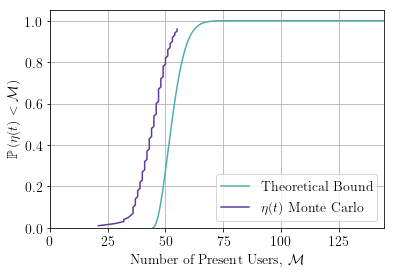

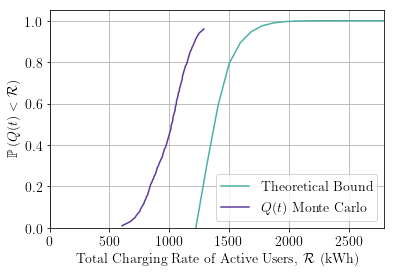

E[x/r]:  1.8735299880726355
E[r]:  27.678565280530144


In [11]:
importlib.reload(util)

# Setup Monte Carlo
mcdraws = 1
percentiles = np.arange(1,97,1)
N_percentile_store = np.empty([1, len(percentiles)])
R_percentile_store = np.empty([1, len(percentiles)])

for draw in range(0, mcdraws):
    ChargingFacilityDiscrete = util.ChargingFacilityDiscrete(V, R, T, alpha_list, x_list, xi_list, 
                                         lambdaval, num_t_samples, model, Beta)
    ChargingFacilityDiscrete.run_simulation()
    #ChargingFacility.get_pricingfunc_plot()
    #ChargingFacility.get_upperbound_plot()
    #ChargingFacility.get_sim_plots()
    print("Draw:", draw)
    N_percentile_store = np.append(N_percentile_store, [np.percentile(ChargingFacilityDiscrete.activeusers, percentiles)], axis=0)
    R_percentile_store = np.append(R_percentile_store, [np.percentile(ChargingFacilityDiscrete.totalrate, percentiles)], axis=0)


ChargingFacilityDiscrete.get_upperbound_plot(N_percentile_store, percentiles, R_percentile_store, percentiles)
print(r"E[x/r]: ", ChargingFacilityDiscrete.exp_xjrj)
print(r"E[r]: ", ChargingFacilityDiscrete.exp_rj)



In [12]:
# importlib.reload(util)

# ChargingFacilityDiscrete = util.ChargingFacilityDiscrete(V, R, T, alpha_list, x_list, xi_list, 
#                                          lambdaval, num_t_samples, model, Beta)
# ChargingFacilityDiscrete.get_upperbound_plot(N_percentile_store, percentiles, R_percentile_store, percentiles)

In [13]:
# Monte Carlo Runs
mcruns = 5000

level = []
for ii in range(0,mcruns):
    x_j = np.random.uniform(x_min, x_max)
    alpha_j = np.random.uniform(alpha_min, alpha_max)
    xi_j = np.random.uniform(xi_min, xi_max)
#     x_j = 30
#     alpha_j = 5 
#     xi_j = 1.70
#     rho_j = x_j/xi_j
#     rho_interval_1 = (alpha_j + Beta)/((V[0] - V[1]) + (alpha_j/R[0] + Beta/R[1]))
    g = x_j*V + alpha_j*np.maximum(0, x_j/R - xi_j) + Beta*np.maximum(0, xi_j - x_j/R)
#     print(g)
    level.append(np.argmin(g) + 1)
#     print("Rho Interval 1: ", rho_interval_1)
#     print("Charging rate: ", R, "Rho_j: ", rho_j, "alpha_j: ", alpha_j)
#     print("Chosen Level of service:", level)
unique, counts = np.unique(level, return_counts=True)
print("MC probabilities of level: ",dict(zip(unique,  counts/mcruns)))
print("Sanity Check Probability Sum for Monte Carlo: ", np.sum(counts/mcruns))


MC probabilities of level:  {1: 0.369, 2: 0.2176, 3: 0.1638, 4: 0.2496}
Sanity Check Probability Sum for Monte Carlo:  1.0


Text(0.5, 1.0, 'PDF of $f_P$')

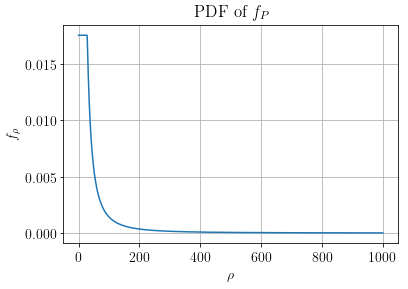

In [14]:
# Define distributions for random variables
def rho_distribution(rho, x_min, x_max, xi_min, xi_max):
    return (np.minimum(xi_max, x_max/rho)**2 - np.maximum(xi_min, x_min/rho)**2)/(2 * (xi_max - xi_min) * (x_max - x_min))
    
def x_xi_derived(z, x_min, x_max, xi_min, xi_max, R):
    bool_val = R * 1/(x_max - x_min) * 1/(xi_max - xi_min) \
            * (np.minimum(x_max/R, z + np.minimum(x_max/R, xi_max)) \
               - np.maximum(x_min/R, z + np.maximum(x_min/R, xi_min)))
    bool_val = bool_val>=0
    
    return bool_val* R * 1/(x_max - x_min) * 1/(xi_max - xi_min) \
            * (np.minimum(x_max/R, z + np.minimum(x_max/R, xi_max)) \
               - np.maximum(x_min/R, z + np.maximum(x_min/R, xi_min)))
# Plot ratio PDF
rho_domain = np.linspace(.0001,1000, 1000)
vals = rho_distribution(rho_domain, x_min, x_max, xi_min, xi_max)
# print(vals)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(rho_domain, vals)
ax.grid(True)
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f_{\rho}$')
ax.set_title(r'PDF of $f_P$')



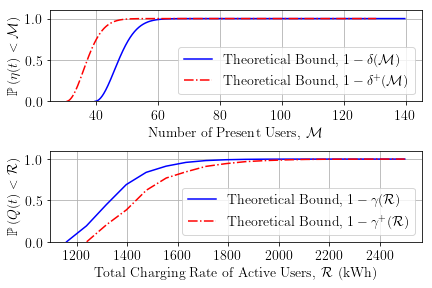

In [20]:
#################################################################################
importlib.reload(util)
params= {'text.latex.preamble' : [r'\usepackage{amsfonts}']}
plt.rcParams.update(params)

T = 100;                    # Total simulation time (hr)
num_t_samples = T*60        # Number of time samples in simulation interval   

# Poisson Parameter
lambdaval = 20 # EVs/hr


# Define upper & lower bounds on demand values & distribution type
x_min = 0
x_max = 100
x_dist_type = 'uniform'
x_list = [x_min, x_max, x_dist_type]

# Define upper & lower bounds on impatience factor values & distribution type
alpha_min = 0
alpha_max = 1
alpha_dist_type = 'uniform'
alpha_list = [alpha_min, alpha_max, alpha_dist_type]

# Define upper & lower bounds on time spent at location
xi_min = 0
xi_max = 2.5
xi_dist_type = 'uniform'
xi_list = [xi_min, xi_max, xi_dist_type]

# V & r coefficients for N pricing functions
Beta = 1.0
V = np.array([5.2, 5.4]) # $/kWh
R1 = np.array([ 30., 40.])#kW
#r_coeff_1 = np.array([ 1., 2.])#kW
R2 = np.array([ 50., 70.])#kW

# Poisson Parameter
lambdaval = 20 # EVs/hr
ChargingFacility1 = util.ChargingFacilityDiscrete(V, R1, T, alpha_list, x_list, xi_list, lambdaval, num_t_samples, model, Beta)
ChargingFacility2 = util.ChargingFacilityDiscrete(V, R2, T, alpha_list, x_list, xi_list, lambdaval, num_t_samples, model, Beta)

fig1 = plt.figure()
fig1.subplots_adjust(wspace=.45)
fig1.subplots_adjust(hspace=.45)

ax1 = fig1.add_subplot(2, 1, 1)
ax1.plot(ChargingFacility1.script_M, 1 - ChargingFacility1.confidence_delta_M,label=r'Theoretical Bound, $1-\delta(\mathcal{M})$', color='blue')
ax1.plot(ChargingFacility2.script_M, 1 - ChargingFacility2.confidence_delta_M,label=r'Theoretical Bound, $1-\delta^+(\mathcal{M})$',color='red',linestyle='-.')
# ax1.set_ylabel(r"$1-\delta(\mathcal{M})$")
ax1.set_ylabel(r"$\mathbb{P}\left(\eta(t) < \mathcal{M}\right)$")
ax1.set_xlabel(r"Number of Present Users, $\mathcal{M}$")
ax1.grid('True',which='major')
ax1.grid('True',which='minor')

ax1.set_ylim([0, 1.1])
ax1.legend()
#ax1.xlim([0, 60])

ax2 = fig1.add_subplot(2, 1, 2)
ax2.plot(ChargingFacility1.script_R[2:], 1 - ChargingFacility1.confidence_delta_R[2:],label=r'Theoretical Bound, $1-\gamma(\mathcal{R})$', color='blue')
ax2.plot(ChargingFacility2.script_R[3:], 1 - ChargingFacility2.confidence_delta_R[3:],label=r'Theoretical Bound, $1-\gamma^+(\mathcal{R})$', color='red',linestyle='-.')
ax2.set_ylabel(r"$\mathbb{P}\left(Q(t) < \mathcal{R}\right)$")
ax2.set_xlabel(r"Total Charging Rate of Active Users, $\mathcal{R}$ (kWh)")
ax2.set_ylim([0, 1.1])
ax2.grid('True',which='major')
ax2.grid('True',which='minor')
ax2.legend()
#ax1.xlim([0, 60])
plt.rcParams.update({'font.size': 14})    
# ax3.legend()
fig1.tight_layout(pad=0.5)

plt.show()
fig1.savefig("./plots/illustration_theorem.pdf", bbox_inches='tight')

# sio.savemat('gamma_R.mat', {'gamma_R':ChargingFacility.confidence_delta_R, 'R_val':ChargingFacility.script_R})

In [16]:
importlib.reload(util)

# %%
importlib.reload(util)
model = "quadratic"
T = 100;                    # Total simulation time (hr)
num_t_samples = T*60        # Number of time samples in simulation interval   

# Poisson Parameter
lambdaval = 20 # EVs/hr

# Define upper & lower bounds on demand values & distribution type
x_min = 0
x_max = 100
x_dist_type = 'uniform'
x_list = [x_min, x_max, x_dist_type]

# Define upper & lower bounds on impatience factor values & distribution type
alpha_min = 0
alpha_max = 10
alpha_dist_type = 'uniform'
alpha_list = [alpha_min, alpha_max, alpha_dist_type]

# Define upper & lower bounds on time spent at location
xi_min = 0
xi_max = 4.0
xi_dist_type = 'uniform'
xi_list = [xi_min, xi_max, xi_dist_type]

# Pricing function parameters
D = .5
B = .25
gamma = 4
tau = .5
R_max = 50
ChargingFacilityContinuous = util.ChargingFacilityContinuous(D, B, gamma,  tau, R_max, T, alpha_list, x_list, 
                                                           xi_list, lambdaval,  num_t_samples, model)
# ChargingFacilityContinuous.get_pricingfunc_plot()
ChargingFacilityContinuous.compute_sanity_check()
# ChargingFacilityDiscrete.run_simulation()


Numerical Sanity Check
E[u]: 3.9321094410288917
E[r]: 12.694926928675553
E[r^2] 212.91168665280844


Draw: 0
Draw: 1
Draw: 2
Draw: 3
Draw: 4
Draw: 5
Draw: 6
Draw: 7
Draw: 8
Draw: 9
Draw: 10
Draw: 11
Draw: 12
Draw: 13
Draw: 14
Draw: 15
Draw: 16
Draw: 17
Draw: 18
Draw: 19
Draw: 20
Draw: 21
Draw: 22
Draw: 23
Draw: 24
Draw: 25
Draw: 26
Draw: 27
Draw: 28
Draw: 29
Draw: 30
Draw: 31
Draw: 32
Draw: 33
Draw: 34
Draw: 35
Draw: 36
Draw: 37
Draw: 38
Draw: 39
Draw: 40
Draw: 41
Draw: 42
Draw: 43
Draw: 44
Draw: 45
Draw: 46
Draw: 47
Draw: 48
Draw: 49
Draw: 50
Draw: 51
Draw: 52
Draw: 53
Draw: 54
Draw: 55
Draw: 56
Draw: 57
Draw: 58
Draw: 59
Draw: 60
Draw: 61
Draw: 62
Draw: 63
Draw: 64
Draw: 65
Draw: 66
Draw: 67
Draw: 68
Draw: 69
Draw: 70
Draw: 71
Draw: 72
Draw: 73
Draw: 74
Draw: 75
Draw: 76
Draw: 77
Draw: 78
Draw: 79
Draw: 80
Draw: 81
Draw: 82
Draw: 83
Draw: 84
Draw: 85
Draw: 86
Draw: 87
Draw: 88
Draw: 89
Draw: 90
Draw: 91
Draw: 92
Draw: 93
Draw: 94
Draw: 95
Draw: 96
Draw: 97
Draw: 98
Draw: 99
Draw: 100
Draw: 101
Draw: 102
Draw: 103
Draw: 104
Draw: 105
Draw: 106
Draw: 107
Draw: 108
Draw: 109
Draw: 110


Draw: 831
Draw: 832
Draw: 833
Draw: 834
Draw: 835
Draw: 836
Draw: 837
Draw: 838
Draw: 839
Draw: 840
Draw: 841
Draw: 842
Draw: 843
Draw: 844
Draw: 845
Draw: 846
Draw: 847
Draw: 848
Draw: 849
Draw: 850
Draw: 851
Draw: 852
Draw: 853
Draw: 854
Draw: 855
Draw: 856
Draw: 857
Draw: 858
Draw: 859
Draw: 860
Draw: 861
Draw: 862
Draw: 863
Draw: 864
Draw: 865
Draw: 866
Draw: 867
Draw: 868
Draw: 869
Draw: 870
Draw: 871
Draw: 872
Draw: 873
Draw: 874
Draw: 875
Draw: 876
Draw: 877
Draw: 878
Draw: 879
Draw: 880
Draw: 881
Draw: 882
Draw: 883
Draw: 884
Draw: 885
Draw: 886
Draw: 887
Draw: 888
Draw: 889
Draw: 890
Draw: 891
Draw: 892
Draw: 893
Draw: 894
Draw: 895
Draw: 896
Draw: 897
Draw: 898
Draw: 899
Draw: 900
Draw: 901
Draw: 902
Draw: 903
Draw: 904
Draw: 905
Draw: 906
Draw: 907
Draw: 908
Draw: 909
Draw: 910
Draw: 911
Draw: 912
Draw: 913
Draw: 914
Draw: 915
Draw: 916
Draw: 917
Draw: 918
Draw: 919
Draw: 920
Draw: 921
Draw: 922
Draw: 923
Draw: 924
Draw: 925
Draw: 926
Draw: 927
Draw: 928
Draw: 929
Draw: 930


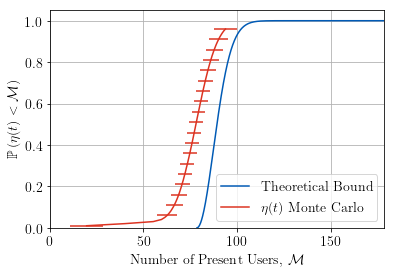

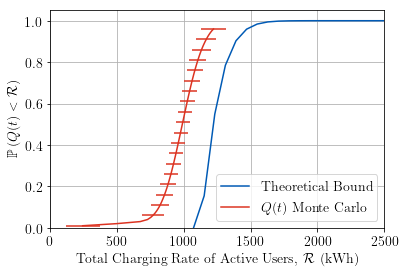

E[r]:  12.676200007227342


In [45]:
importlib.reload(util)

# Setup Monte Carlo
mcdraws = 1000
percentiles = np.arange(1,97,1)
N_percentile_store = np.empty([1, len(percentiles)])
R_percentile_store = np.empty([1, len(percentiles)])

for draw in range(0, mcdraws):
    ChargingFacilityContinuous = util.ChargingFacilityContinuous(D, B, gamma,  tau, R_max, T, alpha_list, x_list, 
                                                           xi_list, lambdaval,  num_t_samples, model)
    ChargingFacilityContinuous.run_simulation()
    #ChargingFacility.get_pricingfunc_plot()
    #ChargingFacility.get_upperbound_plot()
    #ChargingFacility.get_sim_plots()
    print("Draw:", draw)
    N_percentile_store = np.append(N_percentile_store, [np.percentile(ChargingFacilityContinuous.activeusers, percentiles)], axis=0)
    R_percentile_store = np.append(R_percentile_store, [np.percentile(ChargingFacilityContinuous.totalrate, percentiles)], axis=0)


ChargingFacilityContinuous.get_upperbound_plot(N_percentile_store, percentiles, R_percentile_store, percentiles)
print(r"E[r]: ", ChargingFacilityContinuous.exp_rj)

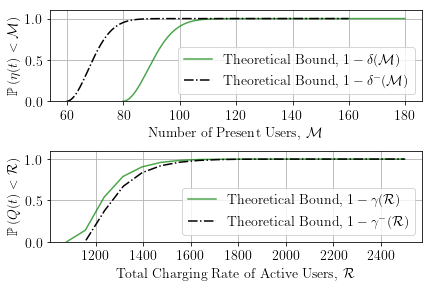

In [23]:
#################################################################################
importlib.reload(util)
model = "quadratic"

T = 100;                    # Total simulation time (hr)
num_t_samples = T*60        # Number of time samples in simulation interval   

# Poisson Parameter
lambdaval = 20 # EVs/hr


# Define upper & lower bounds on demand values & distribution type
x_min = 0
x_max = 100
x_dist_type = 'uniform'
x_list = [x_min, x_max, x_dist_type]

# Define upper & lower bounds on impatience factor values & distribution type
alpha_min = 0
alpha_max = 1
alpha_dist_type = 'uniform'
alpha_list = [alpha_min, alpha_max, alpha_dist_type]

# Define upper & lower bounds on time spent at location
xi_min = 0
xi_max = 2.5
xi_dist_type = 'uniform'
xi_list = [xi_min, xi_max, xi_dist_type]

# Pricing function parameters
D = .5

B = 5
gamma1 = 4
gamma2 = 3
tau = .5
R_max = 50

# Poisson Parameter
lambdaval = 20 # EVs/hr
ChargingFacility1 = util.ChargingFacilityContinuous(D, B, gamma1,  tau, R_max, T, alpha_list, x_list, 
                                                           xi_list, lambdaval,  num_t_samples, model)
ChargingFacility2 = util.ChargingFacilityContinuous(D, B, gamma2,  tau, R_max, T, alpha_list, x_list, 
                                                           xi_list, lambdaval,  num_t_samples, model)

fig1 = plt.figure()
fig1.subplots_adjust(wspace=.35)
fig1.subplots_adjust(hspace=.35)

ax1 = fig1.add_subplot(2, 1, 1)
ax1.plot(ChargingFacility1.script_M, 1 - ChargingFacility1.confidence_delta_M,label=r'Theoretical Bound, $1-\delta(\mathcal{M})$', color='green', alpha=.7)
ax1.plot(ChargingFacility2.script_M, 1 - ChargingFacility2.confidence_delta_M,label=r'Theoretical Bound, $1-\delta^-(\mathcal{M})$',color='black',linestyle='-.')
ax1.set_ylabel(r"$\mathbb{P}\left(\eta(t) < \mathcal{M}\right)$")
ax1.set_xlabel(r"Number of Present Users, $\mathcal{M}$")
ax1.grid('True')
ax1.set_ylim([0, 1.1])
ax1.legend()
#ax1.xlim([0, 60])

ax2 = fig1.add_subplot(2, 1, 2)
ax2.plot(ChargingFacility1.script_R[1:], 1 - ChargingFacility1.confidence_delta_R[1:],label=r'Theoretical Bound, $1-\gamma(\mathcal{R})$', color='green', alpha=.7)
ax2.plot(ChargingFacility2.script_R[2:], 1 - ChargingFacility2.confidence_delta_R[2:],label=r'Theoretical Bound, $1-\gamma^-(\mathcal{R})$', color='black',linestyle='-.')
ax2.set_ylabel(r"$\mathbb{P}\left(Q(t) < \mathcal{R}\right)$")
ax2.set_xlabel(r"Total Charging Rate of Active Users, $\mathcal{R}$ (kWh)")
ax2.set_ylim([0, 1.1])
ax2.grid('True')
ax2.legend()
#ax1.xlim([0, 60])
    
plt.rcParams.update({'font.size': 14})    
# ax3.legend()
fig1.tight_layout(pad=0.5)

plt.show()
fig1.savefig("./plots/illustration_theorem_continuous.pdf", bbox_inches='tight')

# sio.savemat('gamma_R.mat', {'gamma_R':ChargingFacility.confidence_delta_R, 'R_val':ChargingFacility.script_R})

In [22]:
# ChargingFacilityContinuous.get_sim_plots()